In [1]:
# !pip install git+https://github.com/joaopfonseca/ml-research

In [2]:
import sys

sys.path.append("../")

# Imports and Problem setup

In [3]:
from itertools import product
from copy import deepcopy
from rich.progress import track

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import LogisticRegression

from mlresearch.utils import set_matplotlib_style, parallel_loop
from algorec.recourse import NFeatureRecourse
from algorec.populations import BasePopulation
from algorec.environments import (
    BankLoanApplication2,
    BankLoanApplication3,
    WillingnessEnvironment,
)
from algorec.visualization import (
    simulations_scores_panel,
    simulations_success_rate_panels,
)
from algorec.utils import generate_synthetic_data

In [4]:
set_matplotlib_style(8, **{"lines.markersize": 1})

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [5]:
population = BasePopulation(df, categorical=categorical)

# Remove upper and lower bounds
population.action_set_.ub = [1.5, 1.5]
population.action_set_.lb = [0, 0]

recourse = NFeatureRecourse(lr, n_features=2)

# Bank Loan application - Gaussian adaptation

In [6]:
# Meta-simulation variables
N_LOANS_BLA3 = [10]  # number of loans is fixed
ADAPTATION_BLA3 = [0.1, 0.3, 0.5, 0.7, 0.9]
NEW_AGENTS_BLA3 = [8, 9, 10, 11, 12]
N_LOANS_BLA3, ADAPTATION_BLA3, NEW_AGENTS_BLA3

([10], [0.1, 0.3, 0.5, 0.7, 0.9], [8, 9, 10, 11, 12])

In [7]:
def _meta_simulation(params):
    loans, adapt, agents = params
    environment = BankLoanApplication3(
        deepcopy(population),
        deepcopy(recourse),
        n_loans=loans,
        adaptation=adapt,
        new_agents=agents,
        random_state=RNG_SEED,
    )
    try:
        environment.run_simulation(50)
    except ValueError:
        pass

    return {"n_loans": loans, "adaptation": adapt, "new_agents": agents}, environment


results_bla3 = parallel_loop(
    _meta_simulation,
    list(product(N_LOANS_BLA3, ADAPTATION_BLA3, NEW_AGENTS_BLA3)),
    n_jobs=-1,
    progress_bar=True,
    description=None,
)

Output()

Output()

FileNotFoundError: [Errno 2] No such file or directory: '../figures/panel_gaussian_adapt.pdf'

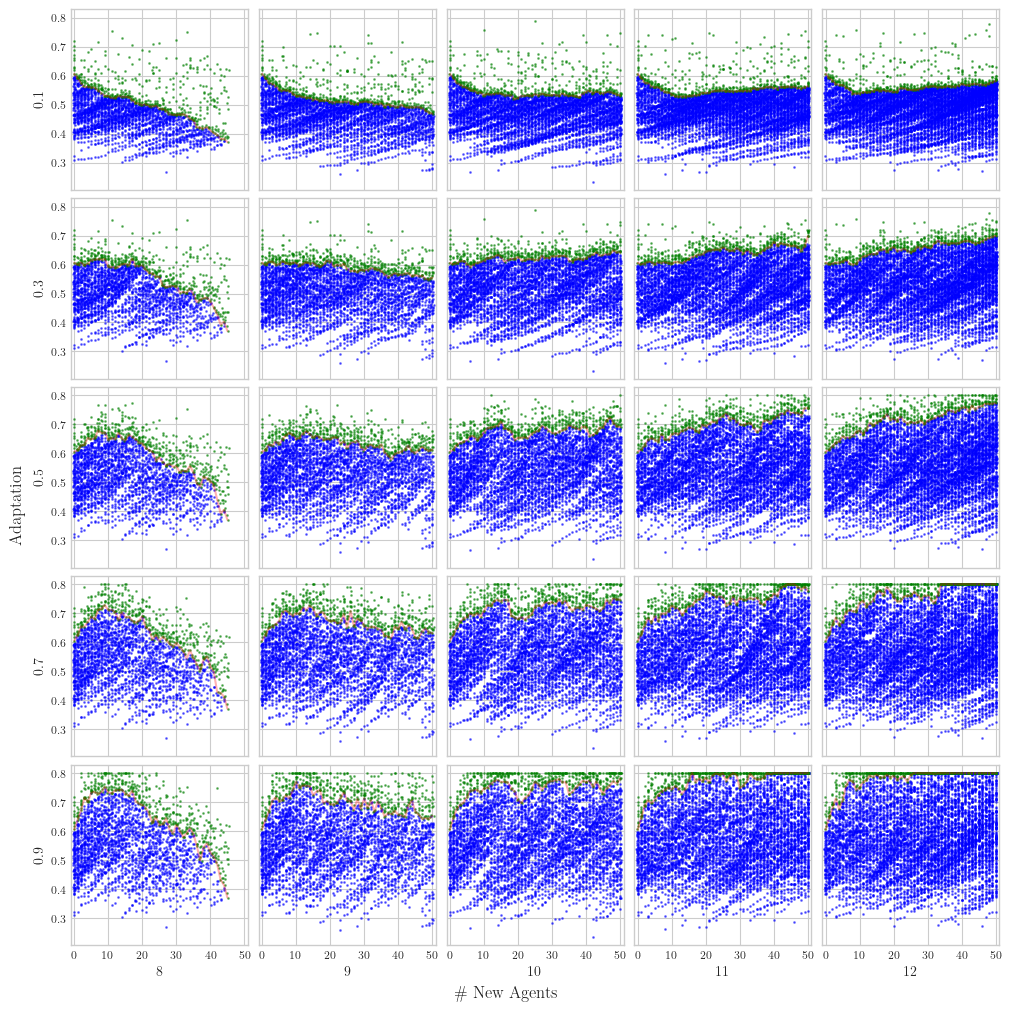

In [18]:
simulations_scores_panel(results_bla3, ADAPTATION_BLA3, NEW_AGENTS_BLA3)
plt.show()

Output()

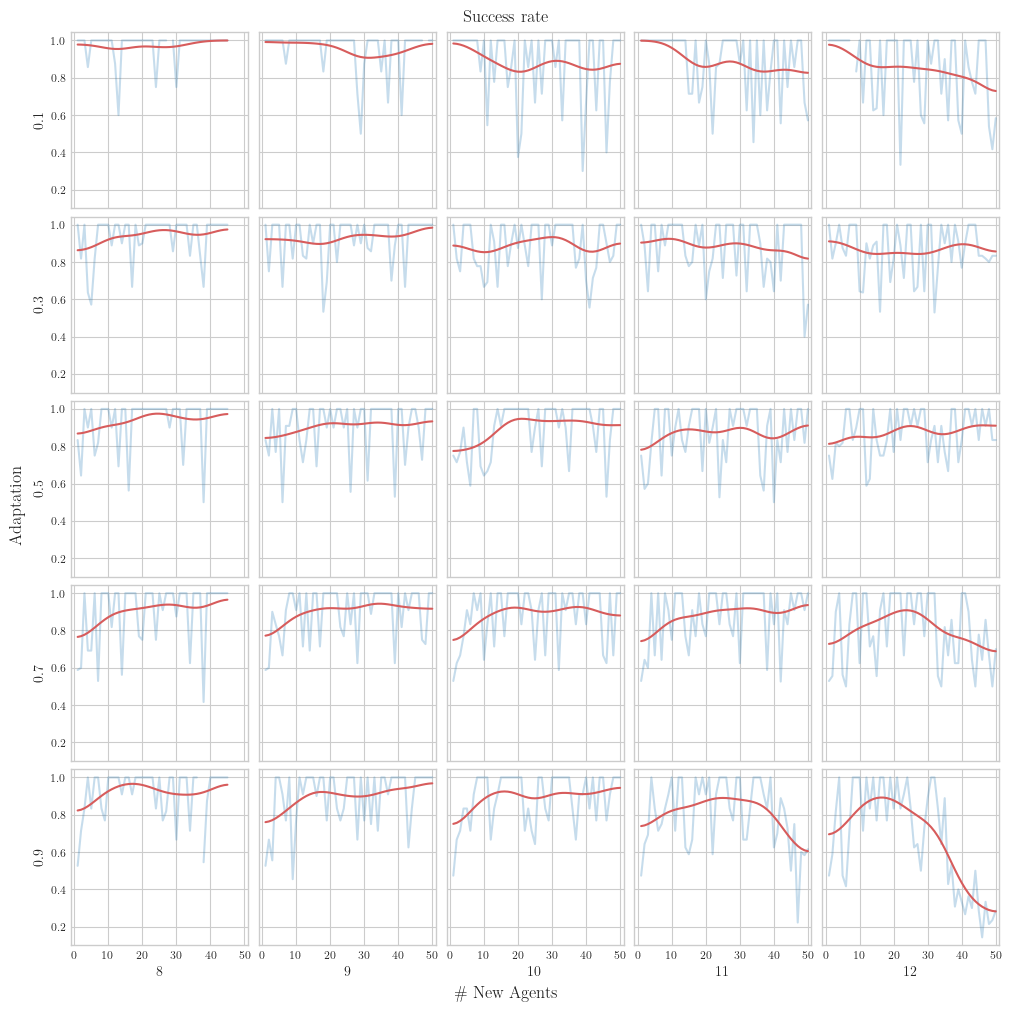

In [9]:
simulations_success_rate_panels(results_bla3, ADAPTATION_BLA3, NEW_AGENTS_BLA3)
plt.show()

# Bank Loan application - Binary adaptation

In [10]:
# Meta-simulation variables
N_LOANS_BLA2 = [10]  # number of loans is fixed
ADAPTATION_BLA2 = [8, 9, 10, 11, 12]
NEW_AGENTS_BLA2 = [8, 9, 10, 11, 12]
N_LOANS_BLA2, ADAPTATION_BLA2, NEW_AGENTS_BLA2

([10], [8, 9, 10, 11, 12], [8, 9, 10, 11, 12])

In [11]:
def _meta_simulation(params):
    loans, adapt, agents = params
    environment = BankLoanApplication2(
        deepcopy(population),
        deepcopy(recourse),
        n_loans=loans,
        adaptation=adapt,
        new_agents=agents,
        random_state=RNG_SEED,
    )
    try:
        environment.run_simulation(50)
    except (ValueError, KeyError):
        pass

    return {"n_loans": loans, "adaptation": adapt, "new_agents": agents}, environment


results_bla2 = parallel_loop(
    _meta_simulation,
    list(product(N_LOANS_BLA2, ADAPTATION_BLA2, NEW_AGENTS_BLA2)),
    n_jobs=-1,
    progress_bar=True,
    description=None,
)

Output()

Output()

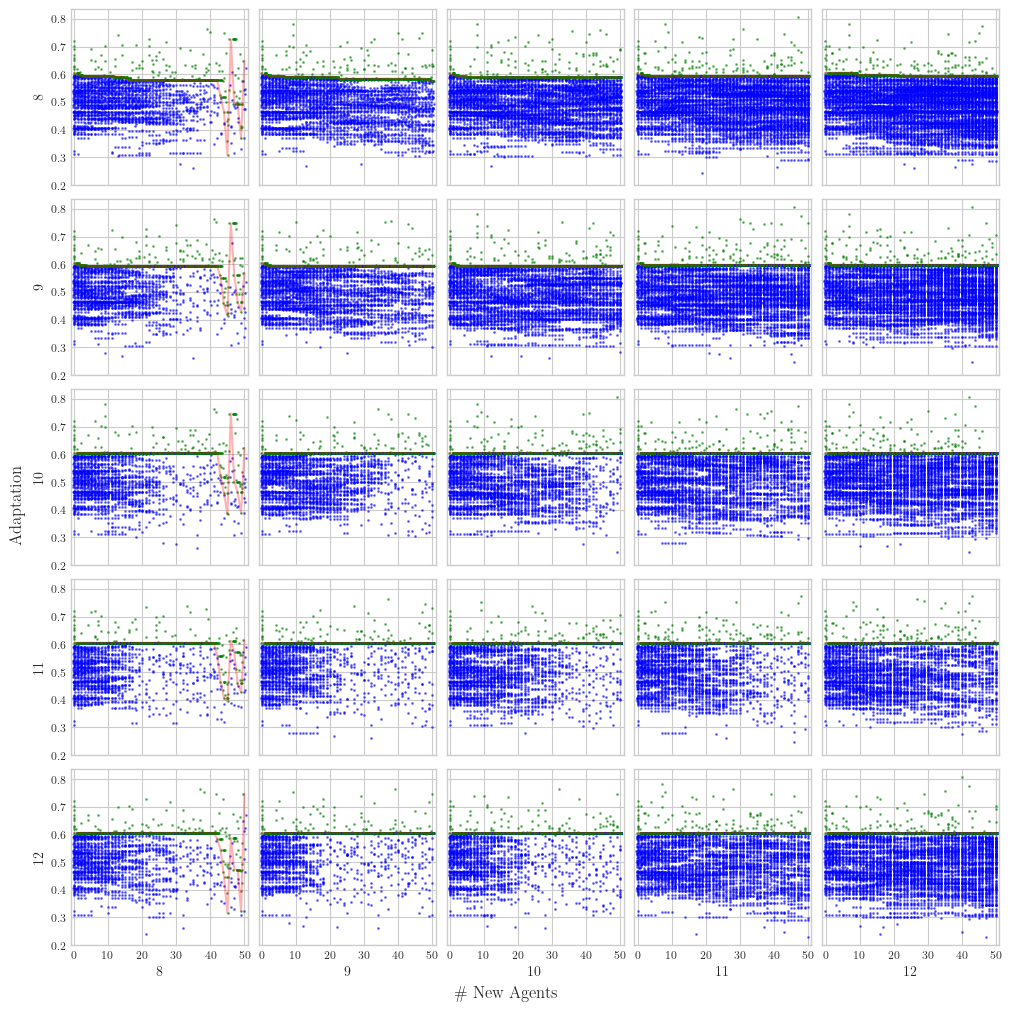

In [12]:
simulations_scores_panel(results_bla2, ADAPTATION_BLA2, NEW_AGENTS_BLA2)
plt.show()

Output()

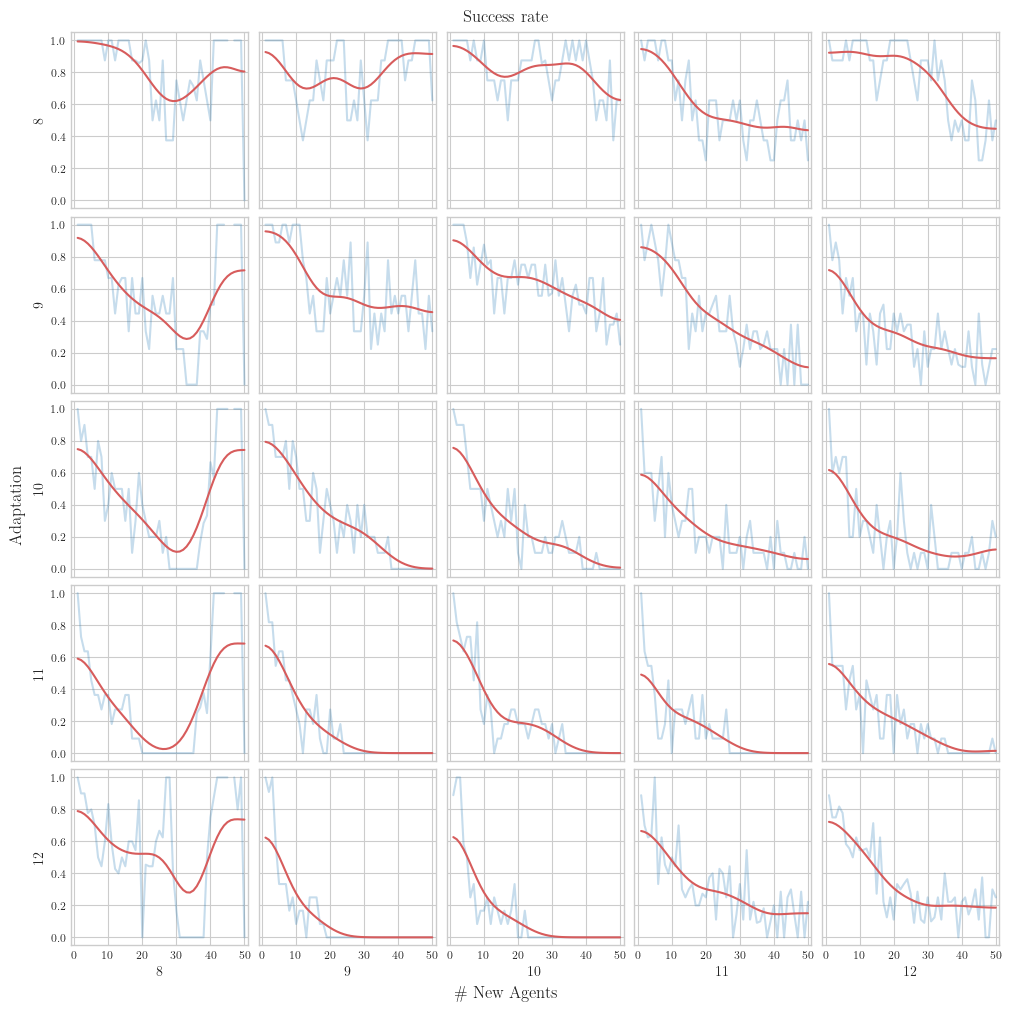

In [13]:
simulations_success_rate_panels(results_bla2, ADAPTATION_BLA2, NEW_AGENTS_BLA2)
plt.show()

# Willingness Environment

In [14]:
# Meta-simulation variables
N_LOANS_WILL = [10]  # number of loans is fixed
ADAPTATION_WILL = [0.1, 0.3, 0.5, 0.7, 0.9]
NEW_AGENTS_WILL = [8, 9, 10, 11, 12]
N_LOANS_WILL, ADAPTATION_WILL, NEW_AGENTS_WILL

([10], [0.1, 0.3, 0.5, 0.7, 0.9], [8, 9, 10, 11, 12])

In [15]:
def _meta_simulation(params):
    loans, adapt, agents = params
    environment = WillingnessEnvironment(
        deepcopy(population),
        deepcopy(recourse),
        n_loans=loans,
        adaptation=adapt,
        new_agents=agents,
        random_state=RNG_SEED,
    )
    try:
        environment.run_simulation(50)
    except ValueError:
        pass

    return {"n_loans": loans, "adaptation": adapt, "new_agents": agents}, environment


results_will = parallel_loop(
    _meta_simulation,
    list(product(N_LOANS_WILL, ADAPTATION_WILL, NEW_AGENTS_WILL)),
    n_jobs=-1,
    progress_bar=True,
    description=None,
)

Output()

Output()

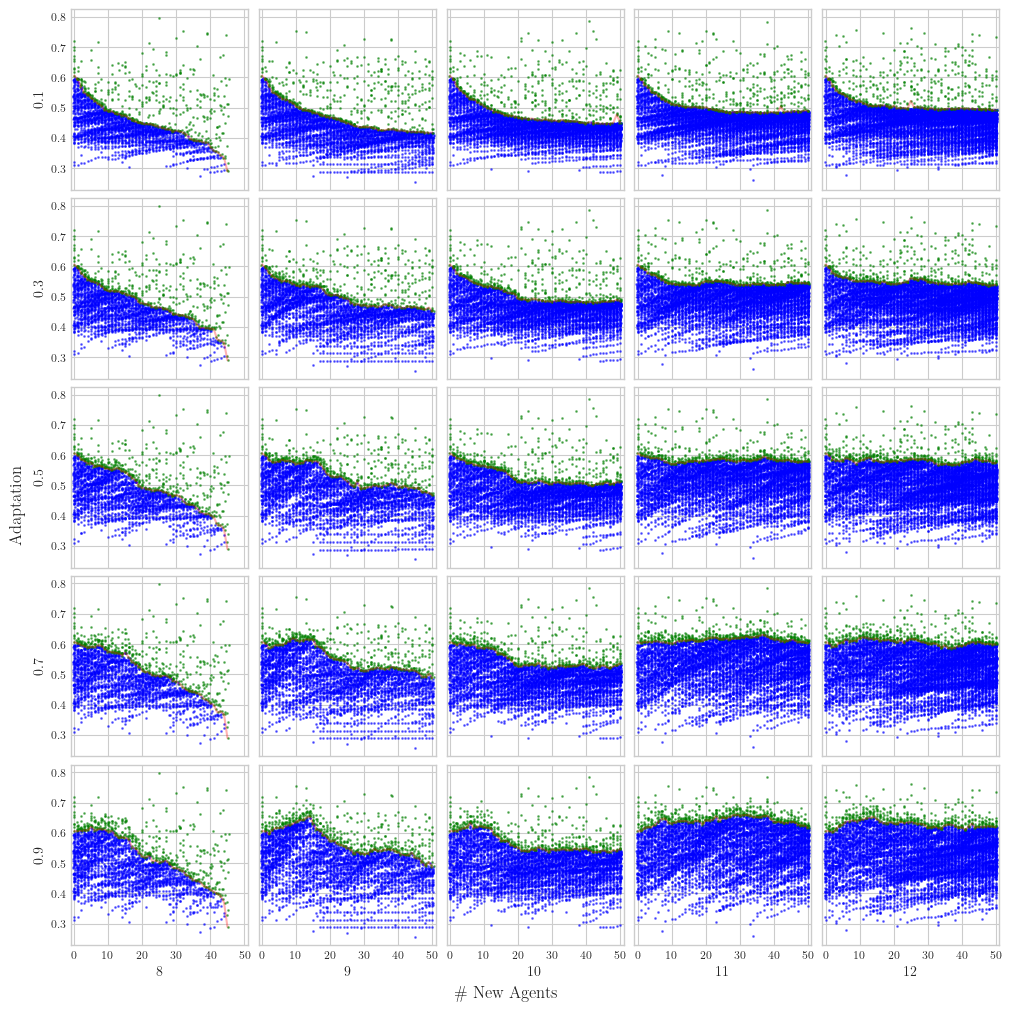

In [16]:
simulations_scores_panel(results_will, ADAPTATION_WILL, NEW_AGENTS_WILL)
plt.show()

Output()

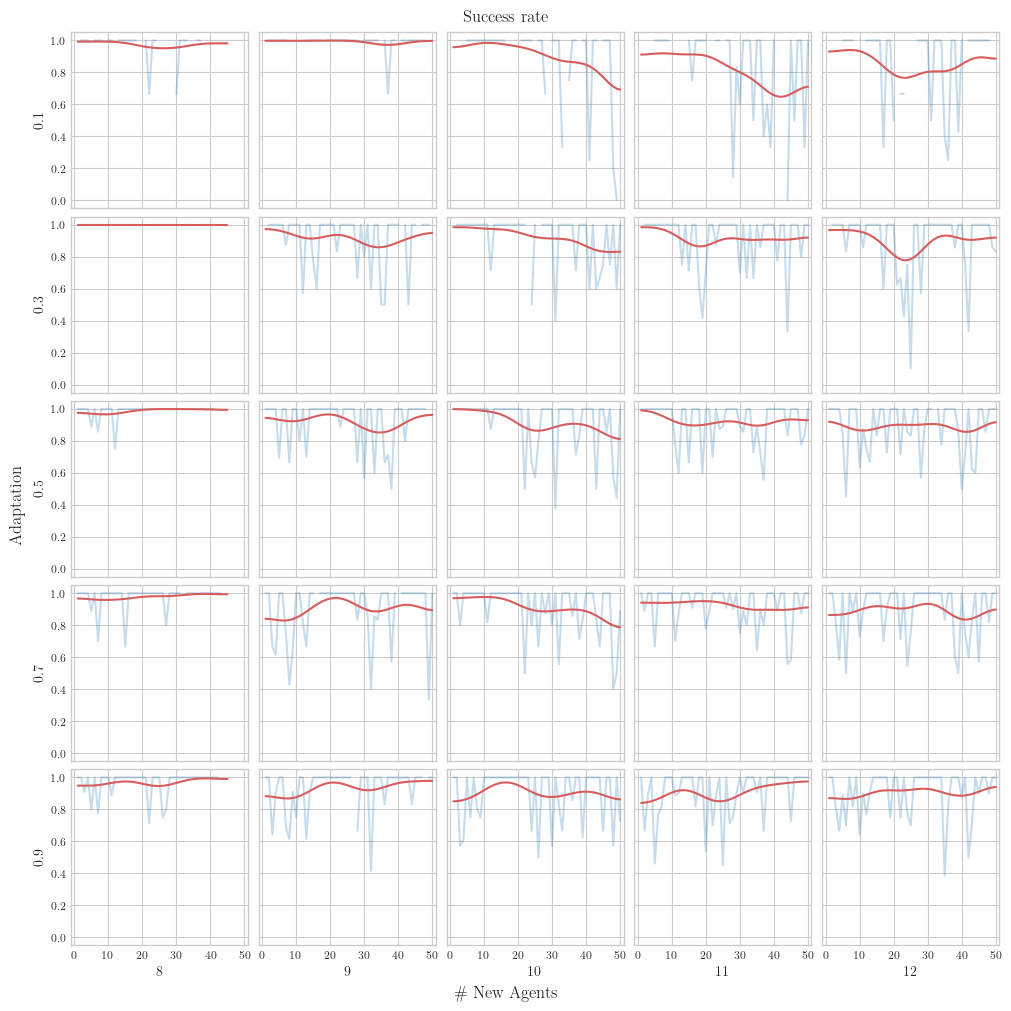

In [17]:
simulations_success_rate_panels(results_will, ADAPTATION_WILL, NEW_AGENTS_WILL)
plt.show()